## Figure 3-3 The proportion of Total Annualised Cost per Household (TACH) for each category of sewer pipes without pumping

tach: 5000
tach: 107
beforeTach: 5000
tach: 421
beforeTach: 107
tach: 169
beforeTach: 421


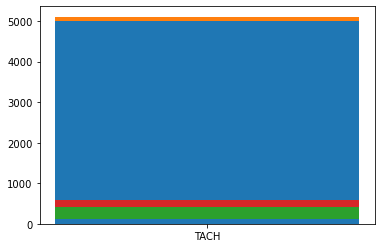

In [35]:
# load matplotlib
import matplotlib.pyplot as plt

# data set
categories = ['Direct CapEx', 'Indirect CapEx', 'Direct OpEx', 'Indirect OpEx']
tachs = [5000, 107, 421, 169]

title = 'TACH'

# plot stacked bar chart
for i, category in enumerate(categories):
    tach = tachs[i]
    print('tach: {}'.format(tach))
    if i == 0:
        plt.bar(title, tach)
    else:
        beforeTach = tachs[i - 1]
        print('beforeTach: {}'.format(beforeTach))
        plt.bar(title, tach, bottom=beforeTach)
plt.show()

# x = [1, 2, 3, 4]
# height = [10, 20, 30, 40]
# height2 =[5, 10, 15, 20]
 
# plt.bar(x, height)
# plt.bar(x, height2, bottom=height)

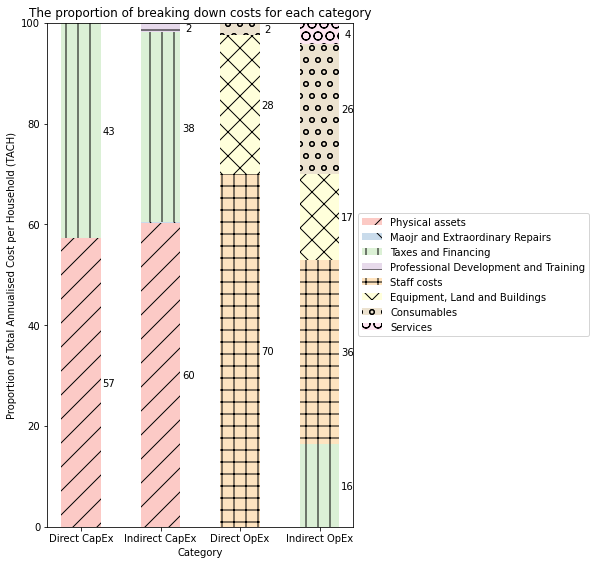

In [162]:
import matplotlib.pyplot as plt
import pandas as pd

values = [
    [2866, 64, 0, 0],
    [0, 0.1, 0, 0],
    [2134, 40, 0, 28],
    [0, 2, 0, 0],
    [0, 0, 295, 62],
    [0, 0, 116, 29],
    [0, 0, 10, 44],
    [0, 0, 0, 7],
]
rows = [
    'Physical assets', 
    'Maojr and Extraordinary Repairs',
    'Taxes and Financing', 
    'Professional Development and Training',
    'Staff costs',
    'Equipment, Land and Buildings',
    'Consumables',
    'Services',
]
columns = [
    'Direct CapEx',
    'Indirect CapEx',
    'Direct OpEx',
    'Indirect OpEx',
]

df = pd.DataFrame(values,
                  columns=columns,
                  index=rows)

# print(df)

for column_name in df:
    df[column_name] = (df[column_name] / df[column_name].sum()) * 100

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.get_cmap("Pastel1").colors)
fig, ax = plt.subplots(figsize=(5, 7))
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=1.1)

hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O']

for i in range(len(df)):
    bar = ax.bar(df.columns,
          df.iloc[i],
          bottom=df.iloc[:i].sum(),
          width=.5,
          alpha=.7,
          hatch=hatches[i])

    for rect, value in zip(bar, df.iloc[i]):
        if round(value) == 0:
            continue
        cx = rect.get_x() + rect.get_width() / 2
        cy = rect.get_y() + rect.get_height() / 2
        ax.text(cx+0.35, cy-0.2, round(value), color="k", ha="center", va="center")
    
ax.set_title('The proportion of breaking down costs for each category')
ax.set_xlabel('Category')
ax.set_ylabel('Proportion of Total Annualised Cost per Household (TACH)')

ax.legend(df.index.tolist(), loc='center left', bbox_to_anchor=(1, 0.5))
